In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import matplotlib_inline.backend_inline
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from pathlib import Path
import numpy as np
import eazy
import pickle
import gc
import os
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge')
os.chdir(WD)
TEMPDIR = WD.parent / 'BROWN_COSMOS'

from utils import fit_and_save_result_prior

params = {}
params["FILTERS_RES"] = "data/filters/FILTER.RES+SPHEREx+7DT_reduced.res"
params["TEMPLATES_FILE"] = "BROWN_COSMOS.template"
params["TEMP_ERR_FILE"] = "../template_error_cosmos2020.txt"
params["TEMP_ERR_A2"] = 0.0  # nullify the template error

params["SYS_ERR"] = 0.01

params["MW_EBV"] = 0.016577
params["CAT_HAS_EXTCORR"] = False

params["MAIN_OUTPUT_FILE"] = "output"

params["APPLY_PRIOR"] = True
params["PRIOR_FILE"] = "../prior_K_TAO.dat"
params["PRIOR_FILTER"] = 466  # SPHEREx band corresponding to the K-band
params["PRIOR_ABZP"] = 23.9
params["PRIOR_FLOOR"] = 0.01

params["FIX_ZSPEC"] = False
params["Z_MIN"] = 0.002
params["Z_MAX"] = 5.8
params["Z_STEP"] = 0.01
params["Z_STEP_TYPE"] = 1

translate_filename = "dummy.translate"

params["CATALOG_FILE"] = "data/input/COSMOS_input_7DS_IMS_SPHEREx_deep.fits"
dir_output = WD / "output" / "output_COSMOS_7DS_IMS_SPHEREx_deep"
dir_output.mkdir(parents=True, exist_ok=True)
params["OUTPUT_DIRECTORY"] = dir_output.as_posix()
params_COSMOS_7DS_IMS_SPHEREx_deep = params.copy()

In [4]:
import logging
logger = logging.getLogger("3rd_challenge_eazy_test_run_f(c)")
logger.setLevel(logging.DEBUG)

formatter = logging.Formatter("%(asctime)s :: %(levelname)s :: %(message)s")
handler_stream = logging.StreamHandler()
handler_stream.setLevel(logging.DEBUG)
handler_stream.setFormatter(formatter)
handler_file = logging.FileHandler(WD / "3rd_challenge_eazy_testrun_fc.log")
handler_file.setFormatter(formatter)

logger.addHandler(handler_stream)
logger.addHandler(handler_file)

In [19]:
with open("data/tempfilt_SPHEREx+7DS.pickle", "rb") as rfile:
    tempfilt_SPHEREx_7DS = pickle.load(rfile)
    
logger.info(">>>> (re)starting COSMOS_7DS_IMS_SPHEREx_deep")
fit_and_save_result_prior(
    params_COSMOS_7DS_IMS_SPHEREx_deep, tempfilt_SPHEREx_7DS, logger, rerun=True,
    translate_file=translate_filename, multiple_fluxerr=1.
)

2024-10-31 16:13:45,905 :: INFO :: >>>> (re)starting COSMOS_7DS_IMS_SPHEREx_deep
2024-10-31 16:13:45,919 :: INFO :: Running fit_and_save_result_prior with 1 processes
2024-10-31 16:13:46,035 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 16:13:46,036 :: INFO :: Fitting 0th batch =====================


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/input/COSMOS_input_7DS_IMS_SPHEREx_deep.fits
   >>> NOBJ = 1000
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


192it [00:00, 1378.72it/s]
100%|██████████| 192/192 [00:42<00:00,  4.54it/s]


fit_best: 0.6 s (n_proc=1,  NOBJ=999)
fit_best: 0.6 s (n_proc=1,  NOBJ=999)


2024-10-31 16:14:30,961 :: INFO ::  --- finished 0th batch in 00:00:44
2024-10-31 16:14:31,192 :: INFO :: Finished in 00:00:45


In [20]:
scheme = "COSMOS_7DS_IMS_SPHEREx_deep"

outdir = WD / "output" / f"output_{scheme}"
base = Table.read(outdir / "result.fits")
base.rename_column("z_spec", "z_true")
if "HSC_i_MAG" in base.colnames:
    base.rename_column("HSC_i_MAG", "imag")

(0.0, 1.0)

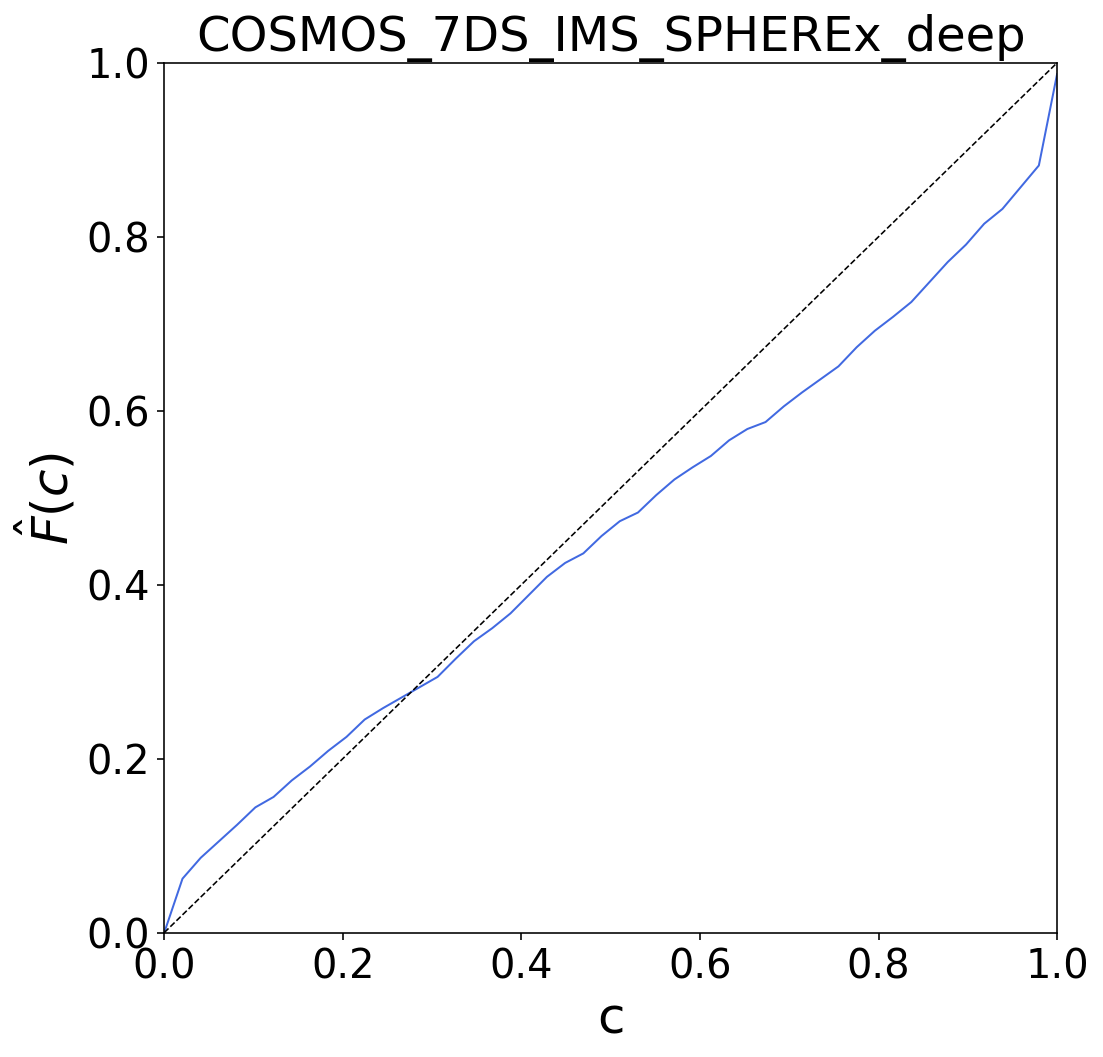

In [21]:
cl = np.linspace(0, 1, 50)
pit = base['pit']
fc = np.zeros_like(cl)
for i, c in enumerate(cl):
    fc[i] = np.count_nonzero(pit < c)
fc = fc / len(pit)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(cl, fc, lw=1, c="royalblue")
ax.set_xlabel("c")
ax.set_ylabel("$\hat{F}(c)$")
ax.set_title(scheme)
ax.plot([0, 1], [0, 1], ls="--", color="k", lw=0.8)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

In [22]:
fit_and_save_result_prior(
    params_COSMOS_7DS_IMS_SPHEREx_deep, tempfilt_SPHEREx_7DS, logger, rerun=True,
    translate_file=translate_filename, multiple_fluxerr=1.3
)

2024-10-31 16:54:29,353 :: INFO :: Running fit_and_save_result_prior with 1 processes
2024-10-31 16:54:29,464 :: INFO :: Multiply flux errors by 1.30 ================
2024-10-31 16:54:29,464 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 16:54:29,479 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 16:54:29,480 :: INFO :: Fitting 0th batch =====================


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 1000
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444 E444 (444): S

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  ../prior_K_TAO.dat


192it [00:00, 1430.77it/s]
100%|██████████| 192/192 [00:43<00:00,  4.43it/s]


fit_best: 0.6 s (n_proc=1,  NOBJ=999)
fit_best: 0.6 s (n_proc=1,  NOBJ=999)


2024-10-31 16:55:15,457 :: INFO ::  --- finished 0th batch in 00:00:45
2024-10-31 16:55:15,685 :: INFO :: Finished in 00:00:46


(0.0, 1.0)

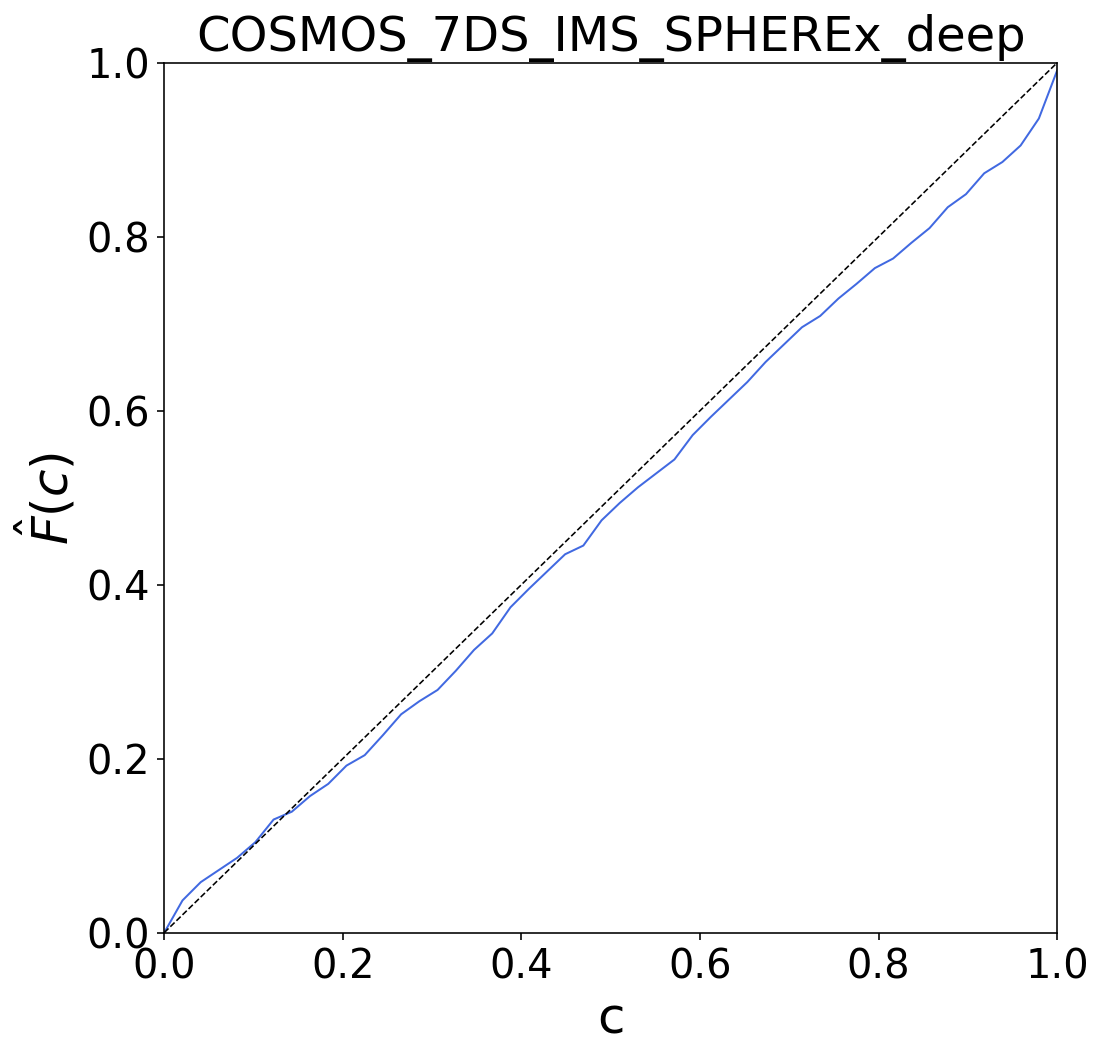

In [23]:
scheme = "COSMOS_7DS_IMS_SPHEREx_deep"

outdir = WD / "output" / f"output_{scheme}"
base = Table.read(outdir / "result.fits")
base.rename_column("z_spec", "z_true")
if "HSC_i_MAG" in base.colnames:
    base.rename_column("HSC_i_MAG", "imag")

cl = np.linspace(0, 1, 50)
pit = base['pit']
fc = np.zeros_like(cl)
for i, c in enumerate(cl):
    fc[i] = np.count_nonzero(pit < c)
fc = fc / len(pit)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(cl, fc, lw=1, c="royalblue")
ax.set_xlabel("c")
ax.set_ylabel("$\hat{F}(c)$")
ax.set_title(scheme)
ax.plot([0, 1], [0, 1], ls="--", color="k", lw=0.8)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

In [24]:
fit_and_save_result_prior(
    params_COSMOS_7DS_IMS_SPHEREx_deep, tempfilt_SPHEREx_7DS, logger, rerun=True,
    translate_file=translate_filename, multiple_fluxerr=2.
)

2024-10-31 16:56:53,769 :: INFO :: Running fit_and_save_result_prior with 1 processes
2024-10-31 16:56:53,882 :: INFO :: Multiply flux errors by 2.00 ================
2024-10-31 16:56:53,883 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 16:56:53,898 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 16:56:53,898 :: INFO :: Fitting 0th batch =====================


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 1000
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444 E444 (444): S

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  ../prior_K_TAO.dat


192it [00:00, 1387.95it/s]
100%|██████████| 192/192 [00:43<00:00,  4.38it/s]


fit_best: 0.9 s (n_proc=1,  NOBJ=999)
fit_best: 0.6 s (n_proc=1,  NOBJ=999)


2024-10-31 16:57:40,804 :: INFO ::  --- finished 0th batch in 00:00:46
2024-10-31 16:57:41,035 :: INFO :: Finished in 00:00:47


(0.0, 1.0)

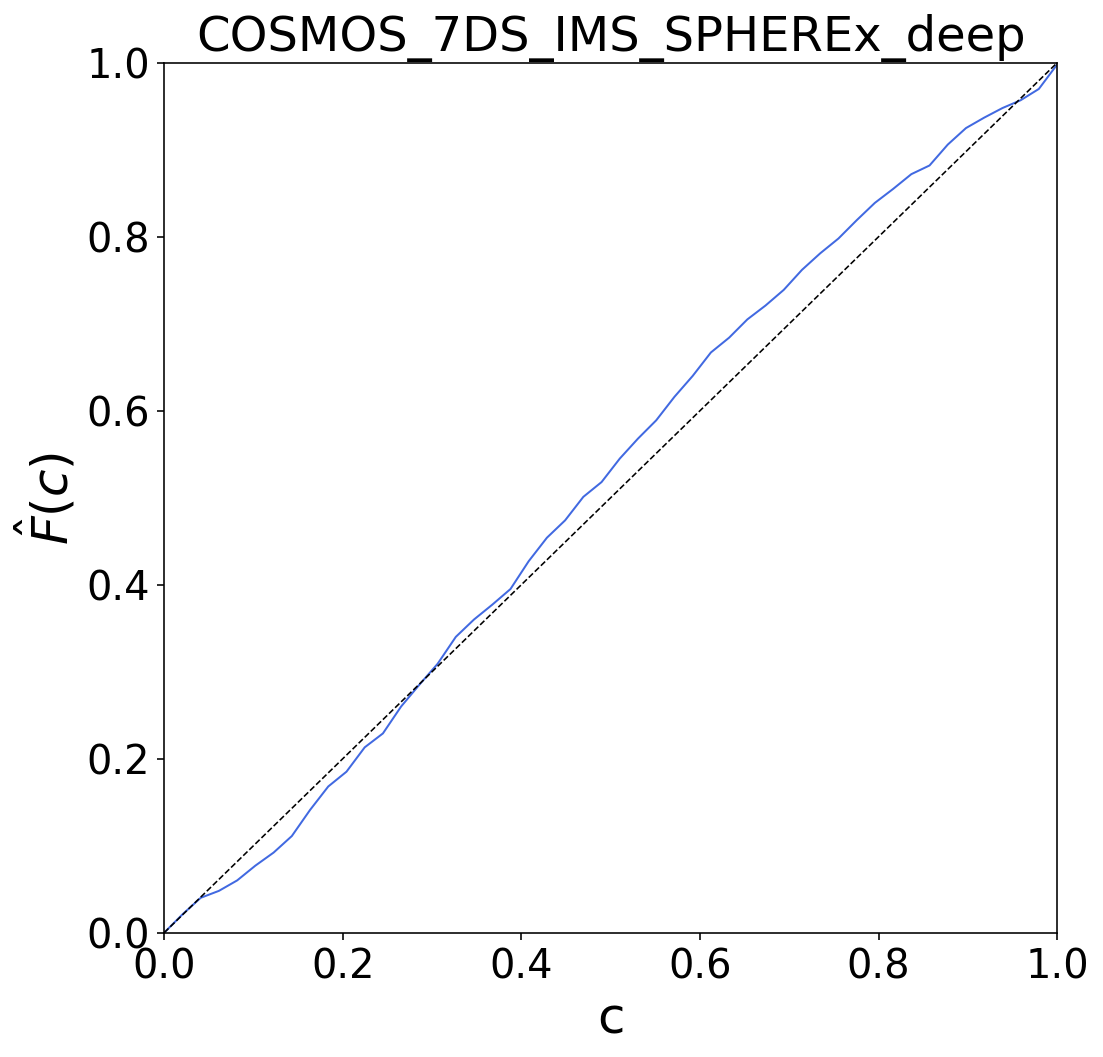

In [25]:
scheme = "COSMOS_7DS_IMS_SPHEREx_deep"

outdir = WD / "output" / f"output_{scheme}"
base = Table.read(outdir / "result.fits")
base.rename_column("z_spec", "z_true")
if "HSC_i_MAG" in base.colnames:
    base.rename_column("HSC_i_MAG", "imag")

cl = np.linspace(0, 1, 50)
pit = base['pit']
fc = np.zeros_like(cl)
for i, c in enumerate(cl):
    fc[i] = np.count_nonzero(pit < c)
fc = fc / len(pit)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(cl, fc, lw=1, c="royalblue")
ax.set_xlabel("c")
ax.set_ylabel("$\hat{F}(c)$")
ax.set_title(scheme)
ax.plot([0, 1], [0, 1], ls="--", color="k", lw=0.8)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

In [26]:
fit_and_save_result_prior(
    params_COSMOS_7DS_IMS_SPHEREx_deep, tempfilt_SPHEREx_7DS, logger, rerun=True,
    translate_file=translate_filename, multiple_fluxerr=1.5
)

2024-10-31 17:01:33,230 :: INFO :: Running fit_and_save_result_prior with 1 processes
2024-10-31 17:01:33,350 :: INFO :: Multiply flux errors by 1.50 ================
2024-10-31 17:01:33,350 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 17:01:33,367 :: INFO :: Fitting 1000 objects in 1 batches ==
2024-10-31 17:01:33,368 :: INFO :: Fitting 0th batch =====================


Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 1000
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444 E444 (444): S

192it [00:00, 1254.12it/s]
100%|██████████| 192/192 [00:43<00:00,  4.41it/s]


fit_best: 0.6 s (n_proc=1,  NOBJ=998)
fit_best: 0.6 s (n_proc=1,  NOBJ=998)


2024-10-31 17:02:19,527 :: INFO ::  --- finished 0th batch in 00:00:46
2024-10-31 17:02:19,754 :: INFO :: Finished in 00:00:46


(0.0, 1.0)

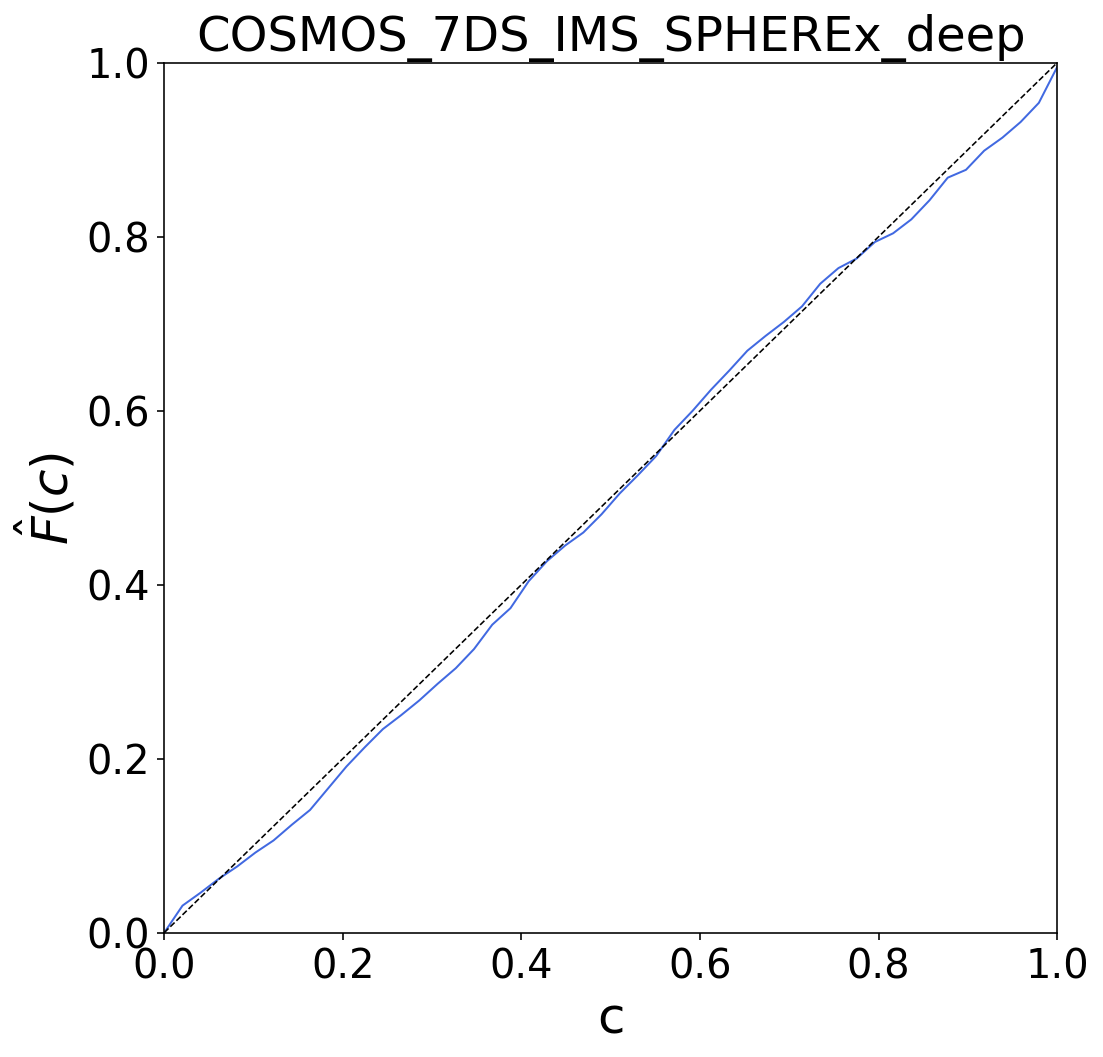

In [27]:
scheme = "COSMOS_7DS_IMS_SPHEREx_deep"

outdir = WD / "output" / f"output_{scheme}"
base = Table.read(outdir / "result.fits")
base.rename_column("z_spec", "z_true")
if "HSC_i_MAG" in base.colnames:
    base.rename_column("HSC_i_MAG", "imag")

cl = np.linspace(0, 1, 50)
pit = base['pit']
fc = np.zeros_like(cl)
for i, c in enumerate(cl):
    fc[i] = np.count_nonzero(pit < c)
fc = fc / len(pit)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(cl, fc, lw=1, c="royalblue")
ax.set_xlabel("c")
ax.set_ylabel("$\hat{F}(c)$")
ax.set_title(scheme)
ax.plot([0, 1], [0, 1], ls="--", color="k", lw=0.8)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)